In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
from tensorflow import nn
import collections
from rdkit.Chem import Descriptors
from rdkit import Chem
from rdkit.Chem import AllChem
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score, multilabel_confusion_matrix


In [2]:
data = pd.read_csv('solvent_dataset.csv', sep="\t",low_memory=False)

In [3]:
smiles_train = data["RP"]
print (smiles_train.shape)
charset = set("".join(list(data.RP))+"!E")
char_to_int = dict((c,i+1) for i,c in enumerate(charset))
int_to_char = dict((i+1,c) for i,c in enumerate(charset))
embed = max([len(smile) for smile in data .RP])
print (str(charset))
print(len(charset), embed)

def vectorize(smiles):
        one_hot =  np.zeros((smiles.shape[0], embed ),dtype=np.int8)
        print(one_hot.shape)
        for i,smile in enumerate(smiles):
            #encode the startchar
            #encode the rest of the chars
            for j,c in enumerate(smile):
                one_hot[i,j] = char_to_int[c]
            #Encode endchar
            
        #Return two, one for input and the other for output
        return one_hot#, one_hot[:,0:-1,:]
X_train = vectorize(smiles_train.values)

(454259,)
{'E', 'c', 'X', 'T', 'G', 'H', 'i', 'L', '6', '+', '3', '\\', 'Z', 'K', 'b', 'A', 'N', 'I', '5', 'C', 's', 'a', '7', 'm', 'S', '0', 'P', '%', 'O', '9', '1', 'u', '@', ']', '/', 'e', 'M', 'g', 'l', 'B', 'Y', 'n', 'F', '!', '8', '4', '=', '(', '[', ')', '2', 'r', 'o', '-', '#', '.'}
56 199
(454259, 199)


In [4]:
def get_best_s():
    zest = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
    zesp = 0.2
    zel = []
    maxpr = 0
    best_nr = 0
    bad_count = 0
    for zzyz in range(0,100):

        try:
            preds1 = modelx.predict(X_test2,verbose=0,batch_size=512)
            #print(preds1)
            #print(y_test2)
            preds1[preds1>=zesp] = 1
            preds1[preds1<1-zesp] = 0
            klkl = accuracy_score(y_test2_2, preds1)

            if klkl > maxpr:
                maxpr = klkl
                best_nr = zesp
            #print (klkl)
        except:
            bad_count +=1
        if bad_count >4:
            break
        zesp+=0.005
        zel.append(klkl)
    #print(best_nr)
    #plt.plot(zel)
    print(maxpr)
    #print(np.array(zel).max())
    #plt.plot(zel)
    return best_nr

In [5]:
#31.32

In [6]:
charset_t = collections.Counter((" ".join(list(data.crude))).split(' '))
#charset_t = collections.Counter(list(data.crude))
print(charset_t)
charset_t=set(charset_t)
char_to_int_t = dict((c,i) for i,c in enumerate(charset_t))
int_to_char_t = dict((i,c) for i,c in enumerate(charset_t))
print(char_to_int_t)
embed_t =  len(charset_t)
print(embed_t)
one_hot_y = np.zeros((len(data), (len(charset_t)) ),dtype=np.int8)
len(one_hot_y[0])
for i,nam in enumerate(data['crude']):
    list_short = list(nam.split(" "))
    first = True
    for z, name in enumerate(list_short):
        if first == True:
            one_hot_y[i][char_to_int_t[name]] = 1
            #first = False
        #elif first !=True:
        #    one_hot_y[i][char_to_int_t[name]+11] = 1
            
Y_train = np.array(one_hot_y)
 

Counter({'ethyl_acetate': 283612, 'hexane': 173175, 'dichloromethane': 95159, 'methanol': 94029, 'chloroform': 35091, 'petroleum_ether': 18849, 'diethyl_ether': 8825, 'toluene': 8484, 'acetone': 6821, 'ethanol': 3804})
{'methanol': 0, 'chloroform': 1, 'diethyl_ether': 2, 'toluene': 3, 'acetone': 4, 'ethyl_acetate': 5, 'ethanol': 6, 'petroleum_ether': 7, 'hexane': 8, 'dichloromethane': 9}
10


In [4]:
embed_smiles = len(charset) +1
input_shape = X_train.shape[1]

In [8]:
X_train = np.array(X_train)
X_train2, X_test2, y_train2_2,y_test2_2  = train_test_split(X_train,Y_train, test_size=0.1,shuffle=True)

In [5]:
inputA = keras.Input(shape=(199,),name='inputx')


x = layers.Embedding(embed_smiles,12, input_length=199)(inputA)


x = layers.Dense(128, activation="relu")(x)

x = layers.Dense(32, activation="relu")(x)

x = layers.Flatten()(x)

p = layers.Dense(64, activation='relu')(x)

p = layers.Dense(10, activation="sigmoid",dtype='float32',name="classification")(p)


modelx = keras.Model(inputs=inputA, outputs=p)

modelx.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
print (modelx.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputx (InputLayer)          [(None, 199)]             0         
_________________________________________________________________
embedding (Embedding)        (None, 199, 12)           684       
_________________________________________________________________
dense (Dense)                (None, 199, 128)          1664      
_________________________________________________________________
dense_1 (Dense)              (None, 199, 32)           4128      
_________________________________________________________________
flatten (Flatten)            (None, 6368)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                407616    
_________________________________________________________________
classification (Dense)       (None, 10)                650   

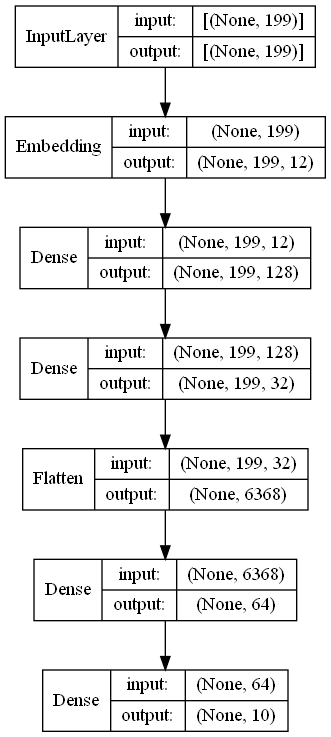

In [6]:
tf.keras.utils.plot_model(
    modelx,
    to_file="model.png",show_shapes=True,show_layer_names=False)

Epoch 1/30
1518/1518 [==============================] - 12s 7ms/step - loss: 0.3181 - binary_accuracy: 0.8640 - val_loss: 0.2918 - val_binary_accuracy: 0.8711
Epoch 2/30
1518/1518 [==============================] - 11s 7ms/step - loss: 0.2904 - binary_accuracy: 0.8714 - val_loss: 0.2885 - val_binary_accuracy: 0.8727
Epoch 3/30
1518/1518 [==============================] - 11s 7ms/step - loss: 0.2875 - binary_accuracy: 0.8726 - val_loss: 0.2874 - val_binary_accuracy: 0.8735
Epoch 4/30
1518/1518 [==============================] - 11s 7ms/step - loss: 0.2853 - binary_accuracy: 0.8736 - val_loss: 0.2861 - val_binary_accuracy: 0.8741
Epoch 5/30
1518/1518 [==============================] - 11s 7ms/step - loss: 0.2838 - binary_accuracy: 0.8740 - val_loss: 0.2862 - val_binary_accuracy: 0.8739
Epoch 6/30
1518/1518 [==============================] - 11s 7ms/step - loss: 0.2819 - binary_accuracy: 0.8750 - val_loss: 0.2846 - val_binary_accuracy: 0.8743
Epoch 7/30
1518/1518 [========================

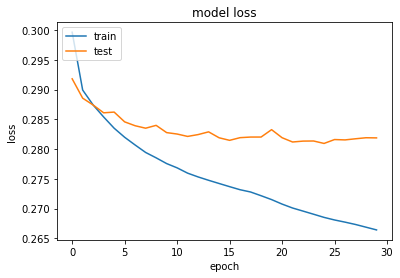

In [15]:
history = modelx.fit(X_train2,y_train2_2, epochs=30, batch_size=256, validation_split = 0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [1]:
preds1 = modelx.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)

preds1[preds1>=0.5] = 1
preds1[preds1<1-0.5] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

NameError: name 'modelx' is not defined

In [7]:
inputA = keras.Input(shape=(199,),name='inputx')


x = layers.Embedding(embed_smiles,12, input_length=199)(inputA)

x = layers.Permute((2,1))(x)

x = layers.LSTM(128,return_sequences=False)(x)

p = layers.Dense(128, activation='relu')(x)

p = layers.Dense(64, activation='relu')(x)

p = layers.Dense(10, activation="sigmoid",dtype='float32',name="classification")(p)

modelx = keras.Model(inputs=inputA, outputs=p)

modelx.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
print (modelx.summary())

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputx (InputLayer)          [(None, 199)]             0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 199, 12)           684       
_________________________________________________________________
permute (Permute)            (None, 12, 199)           0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               167936    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
classification (Dense)       (None, 10)                650       
Total params: 177,526
Trainable params: 177,526
Non-trainable params: 0
_____________________________________________________

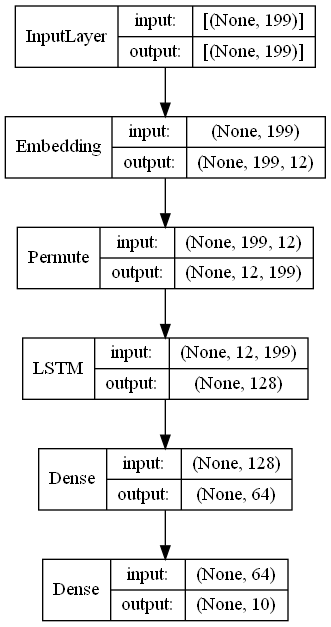

In [8]:
tf.keras.utils.plot_model(
    modelx,
    to_file="model.png",show_shapes=True,show_layer_names=False)

In [17]:
history = modelx.fit(X_train2,y_train2_2, epochs=20, batch_size=256, validation_split = 0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Epoch 1/420
1518/1518 [==============================] - 14s 8ms/step - loss: 0.3212 - binary_accuracy: 0.8616 - val_loss: 0.2922 - val_binary_accuracy: 0.8706
Epoch 2/420
1518/1518 [==============================] - 13s 8ms/step - loss: 0.2920 - binary_accuracy: 0.8712 - val_loss: 0.2904 - val_binary_accuracy: 0.8715
Epoch 3/420
1518/1518 [==============================] - 12s 8ms/step - loss: 0.2896 - binary_accuracy: 0.8722 - val_loss: 0.2882 - val_binary_accuracy: 0.8722
Epoch 4/420
1518/1518 [==============================] - 12s 8ms/step - loss: 0.2868 - binary_accuracy: 0.8735 - val_loss: 0.2856 - val_binary_accuracy: 0.8736
Epoch 5/420
1518/1518 [==============================] - 12s 8ms/step - loss: 0.2828 - binary_accuracy: 0.8758 - val_loss: 0.2827 - val_binary_accuracy: 0.8739
Epoch 6/420
1518/1518 [==============================] - 11s 7ms/step - loss: 0.2754 - binary_accuracy: 0.8796 - val_loss: 0.2764 - val_binary_accuracy: 0.8783
Epoch 7/420
1518/1518 [=================

KeyboardInterrupt: 

In [18]:
preds1 = modelx.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 0s 3ms/step
0.3867388720116233
0.3867388720116233
              precision    recall  f1-score   support

           0       0.52      0.26      0.34      3493
           1       0.52      0.04      0.08      1886
           2       0.49      0.14      0.22       839
           3       0.53      0.03      0.05       383
           4       0.57      0.57      0.57      9280
           5       0.51      0.43      0.47      9437
           6       0.55      0.75      0.64     17376
           7       0.60      0.12      0.20       706
           8       0.57      0.04      0.08       907
           9       0.72      0.90      0.80     28392

   micro avg       0.63      0.68      0.65     72699
   macro avg       0.56      0.33      0.34     72699
weighted avg       0.61      0.68      0.62     72699
 samples avg       0.62      0.67      0.63     72699

[[[41095   838]
  [ 2602   891]]

 [[43461    79]
  [ 1802    84]]

 [[44460   127]
  [  719   1

In [9]:
inputA = keras.Input(shape=(199,),name='inputx')


x = layers.Embedding(embed_smiles,12, input_length=199)(inputA)



k = layers.Conv1D(64,12,activation='relu')(x)
k = layers.AveragePooling1D(3)(k)
k = layers.Conv1D(64,12,activation='relu')(k)
k = layers.AveragePooling1D(3)(k)
k = layers.Conv1D(64,5,activation='relu')(k)
k = layers.AveragePooling1D(3)(k)

k = layers.Flatten()(k)

p = layers.Dense(64, activation='relu')(k)

#p = layers.Dense(64, activation='relu')(p)

p = layers.Dense(10, activation="sigmoid",dtype='float32',name="ratio")(p)

modelx = keras.Model(inputs=inputA, outputs=p)

modelx.compile(loss='binary_crossentropy', optimizer="adam", metrics='binary_accuracy')
modelx.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputx (InputLayer)          [(None, 199)]             0         
_________________________________________________________________
embedding_2 (Embedding)      (None, 199, 12)           684       
_________________________________________________________________
conv1d (Conv1D)              (None, 188, 64)           9280      
_________________________________________________________________
average_pooling1d (AveragePo (None, 62, 64)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 51, 64)            49216     
_________________________________________________________________
average_pooling1d_1 (Average (None, 17, 64)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 13, 64)            2054

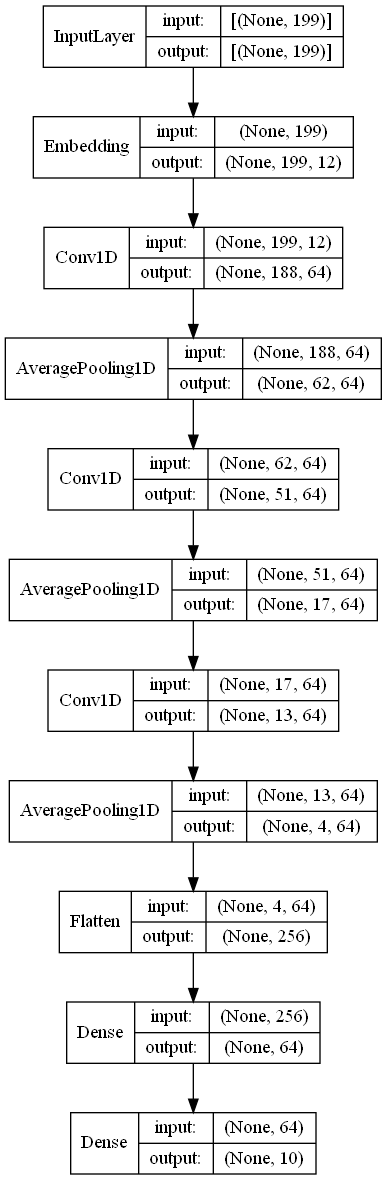

In [10]:
tf.keras.utils.plot_model(
    modelx,
    to_file="model.png",show_shapes=True,show_layer_names=False)

Epoch 1/20
1518/1518 [==============================] - 18s 10ms/step - loss: 0.3191 - binary_accuracy: 0.8635 - val_loss: 0.2852 - val_binary_accuracy: 0.8744
Epoch 2/20
1518/1518 [==============================] - 15s 10ms/step - loss: 0.2829 - binary_accuracy: 0.8761 - val_loss: 0.2781 - val_binary_accuracy: 0.8790
Epoch 3/20
1518/1518 [==============================] - 15s 10ms/step - loss: 0.2750 - binary_accuracy: 0.8803 - val_loss: 0.2712 - val_binary_accuracy: 0.8819
Epoch 4/20
1518/1518 [==============================] - 15s 10ms/step - loss: 0.2694 - binary_accuracy: 0.8832 - val_loss: 0.2690 - val_binary_accuracy: 0.8830
Epoch 5/20
1518/1518 [==============================] - 15s 10ms/step - loss: 0.2644 - binary_accuracy: 0.8860 - val_loss: 0.2661 - val_binary_accuracy: 0.8848
Epoch 6/20
1518/1518 [==============================] - 15s 10ms/step - loss: 0.2605 - binary_accuracy: 0.8881 - val_loss: 0.2616 - val_binary_accuracy: 0.8875
Epoch 7/20
1518/1518 [==================

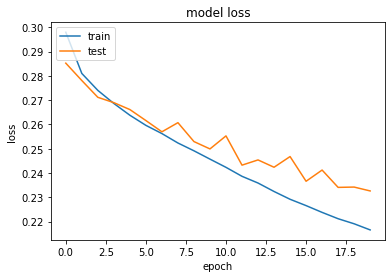

In [18]:
history = modelx.fit(X_train2,y_train2_2, epochs=20, batch_size=256, validation_split = 0.05)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
preds1 = modelx.predict(X_test2,verbose=1,batch_size=512)
#print(preds1)
#print(y_test2)
ac_sc = get_best_s()
preds1[preds1>=ac_sc] = 1
preds1[preds1<1-ac_sc] = 0
print (accuracy_score(y_test2_2, preds1))
print (classification_report(y_test2_2, preds1))
print (multilabel_confusion_matrix(y_test2_2, preds1))

89/89 [==============================] - 1s 4ms/step
0.425637300224541
0.425637300224541
              precision    recall  f1-score   support

           0       0.61      0.75      0.67      9420
           1       0.66      0.35      0.46      3465
           2       0.51      0.02      0.04       910
           3       0.66      0.15      0.25       860
           4       0.79      0.12      0.21       685
           5       0.77      0.89      0.83     28309
           6       1.00      0.01      0.01       386
           7       0.61      0.06      0.11      1900
           8       0.62      0.71      0.66     17195
           9       0.56      0.56      0.56      9496

   micro avg       0.68      0.71      0.69     72626
   macro avg       0.68      0.36      0.38     72626
weighted avg       0.67      0.71      0.67     72626
 samples avg       0.68      0.70      0.66     72626

[[[31579  4427]
  [ 2376  7044]]

 [[41340   621]
  [ 2248  1217]]

 [[44497    19]
  [  890    20